# Interactive Lyot coronagraph

M Kenworthy // Leiden Observatory // kenworthy@strw.leidenuniv.nl

Based on E. Por hcipy tutorials


In [1]:
from hcipy import *
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches


import ipywidgets as widgets
from ipywidgets import interactive



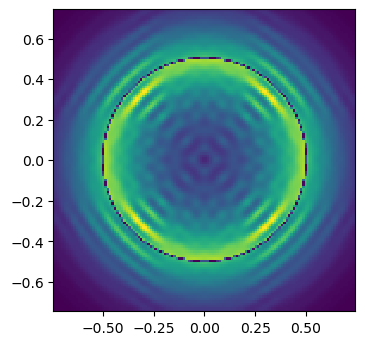

In [22]:
mpl.rcParams['figure.dpi'] = 100

pupil_grid = make_pupil_grid(128, 1.5)
focal_grid = make_focal_grid(8, 12)
prop = FraunhoferPropagator(pupil_grid, focal_grid)

aperture = evaluate_supersampled(circular_aperture(1), pupil_grid, 4)

wf = Wavefront(aperture)
img_ref = prop(wf).intensity

#imshow_field(np.log10(img_ref / img_ref.max()), vmin=-5, vmax=0, cmap='inferno')

#imshow_field(aperture)

# okay, make the lyot mask for the coronagraph
lyot_mask = evaluate_supersampled(circular_aperture(0.99), pupil_grid, 4)

focal_plane_mask = evaluate_supersampled(make_obstructed_circular_aperture(25.0, 0.05), focal_grid, 4)

coro = LyotCoronagraph(pupil_grid, focal_plane_mask)

#imshow_field(focal_plane_mask)

#imshow_field(focal_plane_mask*img_ref)

pupil_image = coro(wf)

imshow_field(pupil_image.intensity)

In [39]:
def addtext(a,s):
    a.text(0.05, 0.95, s, ha='left', va='top', transform=a.transAxes, color='white', fontsize=20)

def f(dy, b):
    fig, (x2, x3, x4, x5, x6) = plt.subplots(1,5,figsize=(14,4))
    
    for a in (x2,x3,x4,x5,x6):
        a.set_aspect('equal')

    for a in (x2,x3,x4):
        a.get_yaxis().set_ticks([])
    
    wf = Wavefront(aperture * np.exp(2j * np.pi * pupil_grid.y * dy))

    img_ref = prop(wf).intensity
    
    imshow_field(np.log10(img_ref / img_ref.max()), vmin=-5, vmax=0, cmap='inferno', ax=x2)
    addtext(x2,"B")
    
    
    
    
    lyot_mask = evaluate_supersampled(circular_aperture(0.99), pupil_grid, 4)

    focal_plane_mask = evaluate_supersampled(make_obstructed_circular_aperture(30.0, 0.05), focal_grid, 4)
    
    imshow_field(np.log10((focal_plane_mask*img_ref) / img_ref.max()), vmin=-5, vmax=0, cmap='inferno', ax=x3)
    addtext(x3,"C")
 
    coro = LyotCoronagraph(pupil_grid, focal_plane_mask)

    pupil_image = coro(wf)
    
    imshow_field(pupil_image.intensity, vmax=2, cmap='inferno', ax=x4)
    addtext(x4,"D")
    
    #lyot_mask = evaluate_supersampled(circular_aperture(b), pupil_grid, 4)
    
    #lyot_stop = Apodizer(lyot_mask)
    
    #after_lyot_stop = lyot_stop(pupil_image)
    
    #imshow_field(after_lyot_stop.intensity, vmax=2, cmap='inferno',ax=x3)
    #addtext(x2,"D")

    #img = prop(after_lyot_stop).intensity
    
    #imshow_field(pupil_image.intensity, vmax=2, cmap='inferno',ax=x2)
    #addtext(x3,"E")

    #imshow_field(np.log10(img / img_ref.max()), vmin=-5, vmax=0, cmap='inferno', ax=x4)
    #addtext(x4,"F")
    
    #x1.scatter(0,0,marker='.',color='white')
    #x4.scatter(0,0,marker='.',color='white')
    #x3.add_patch(patches.Circle((0,0), radius=0.5, fill=None,edgecolor='white',linestyle='--'))
    plt.show()

interactive_plot = interactive(f, dy=(0.0, 5.0), b=(0.2, 1.5))
output = interactive_plot.children[-1]
output.layout.height = '210px'
interactive_plot

interactive(children=(FloatSlider(value=2.5, description='dy', max=5.0), FloatSlider(value=0.8500000000000001,…

![Coronagraph layout](coronagraph.jpg)